##### Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- Sensitive 
11. Neural Networks-------------- Sensitive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

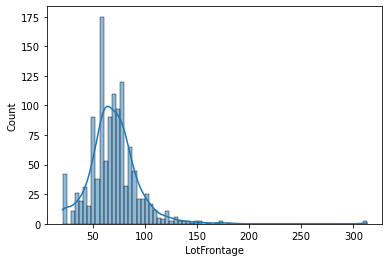

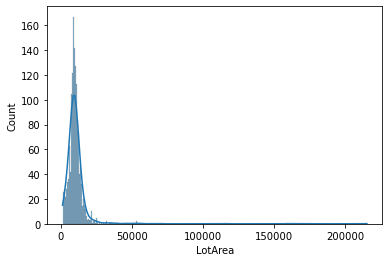

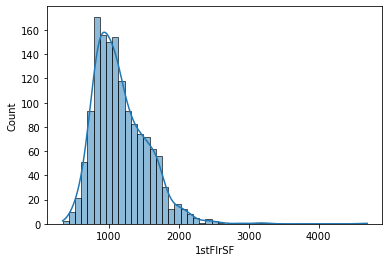

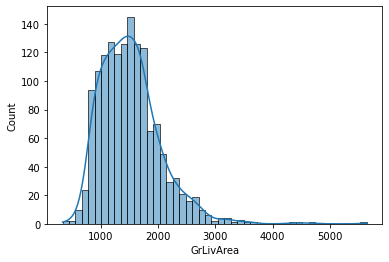

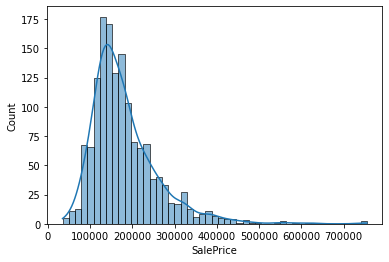

In [5]:
for feature in num_features:
    sns.histplot(df[feature], kde=True)
    plt.show()

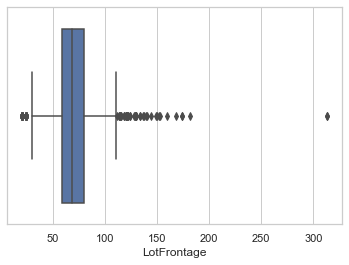

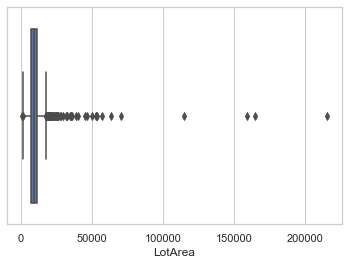

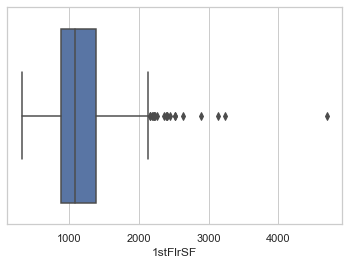

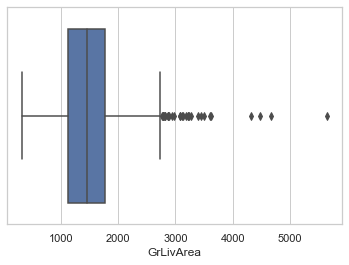

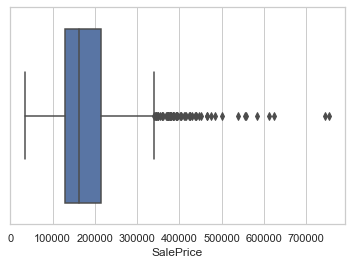

In [6]:
for feature in num_features:
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=feature, data=df,)
    plt.show()

In [7]:
##Extreme Outliers using IQR 
def iqr_feature(features, df_train):
    dict = {}
    max_lmt = []
    min_lmt=[]
    for feature in features:
        q1 = df_train[feature].quantile(0.25)
        q2 = df_train[feature].quantile(0.75)
        IQR = q2 - q1
#         iqr.append(IQR)
        max_limit = q2 + (3 * IQR)
        max_lmt.append(max_limit)
        min_limit = q1 - (3 * IQR) 
        min_lmt.append(min_limit)
#         dict.update({feature: [min_limit,max_limit]})
#     return dict
    return max_lmt, min_lmt
    
max_lmt, min_lmt= iqr_feature(num_features, df)
max_lmt, min_lmt

([143.0, 23745.5, 2919.0, 3718.5, 466075.0],
 [-4.0, -4590.5, -645.75, -812.25, -122100.0])

In [8]:
s1 = pd.Series(max_lmt)
s2 = pd.Series(min_lmt)


df_min_max = pd.DataFrame(list(zip(num_features,s1, s2)), columns=['num_features','max_lmt','min_lmt'])
df_min_max

,num_features,max_lmt,min_lmt
0,LotFrontage,143.0,-4.00
1,LotArea,23745.5,-4590.50
2,1stFlrSF,2919.0,-645.75
3,GrLivArea,3718.5,-812.25
4,SalePrice,466075.0,-122100.00


In [9]:
df_new = df[(df["LotFrontage"]>20.0)&(df["LotFrontage"]<143.0)]

<AxesSubplot:xlabel='LotFrontage'>

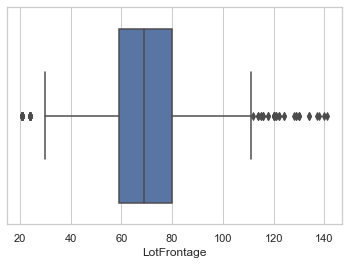

In [10]:
sns.boxplot(x="LotFrontage", data=df_new,)

In [11]:
df.shape

(1460, 81)

In [12]:
df_new.shape

(1189, 81)

In [13]:
df_new['LotFrontage'].describe()

count    1189.000000
mean       68.879731
std        20.607397
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       141.000000
Name: LotFrontage, dtype: float64

In [14]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

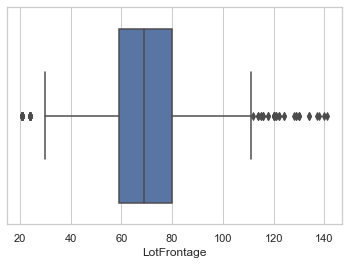

In [15]:
sns.boxplot(x = "LotFrontage", data=df_new)

In [16]:
## other method using standard deviation when there is gaussian distribution 
uppper_boundary=df['1stFlrSF'].mean() + 3* df['1stFlrSF'].std()
lower_boundary=df['1stFlrSF'].mean() - 3* df['1stFlrSF'].std()
print(lower_boundary), print(uppper_boundary),print(df['1stFlrSF'].mean())

2.8634982055457385
2322.3899264519887
1162.626712328767


(None, None, None)

In [17]:
df_new = df_new[(df_new["1stFlrSF"]>2.8634982055457385)&(df_new["1stFlrSF"]<2322.3899264519887)]

In [18]:
df_new.shape

(1183, 81)

<AxesSubplot:xlabel='1stFlrSF'>

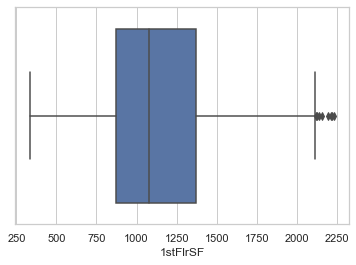

In [19]:
sns.boxplot(x = "1stFlrSF", data=df_new)

In [20]:
mean = df['GrLivArea'].mean()
sd = df['GrLivArea'].std()

In [21]:
threshold = 3
outlier = []
for i in df_new['GrLivArea']:
    z = (i-mean)/sd
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)


outlier in dataset is [3222, 3608, 3493, 3194, 3395, 3279, 3140, 3627, 3238]


In [22]:
df_new.shape

(1183, 81)

In [23]:
df_new = df_new[~df_new['GrLivArea'].isin(outlier)]

In [24]:
df_new.shape

(1174, 81)

<AxesSubplot:xlabel='GrLivArea'>

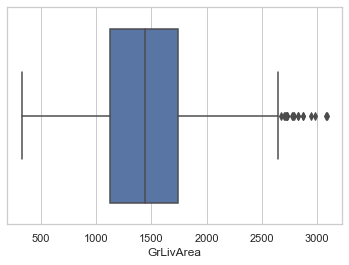

In [25]:
sns.boxplot(x = "GrLivArea", data=df_new)

In [26]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    df_new[feature]=np.log(df_new[feature])

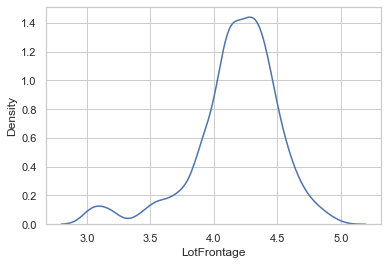

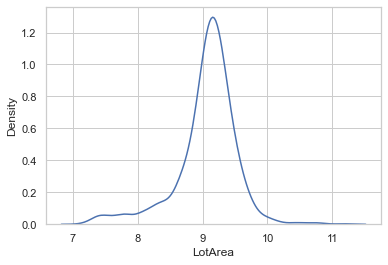

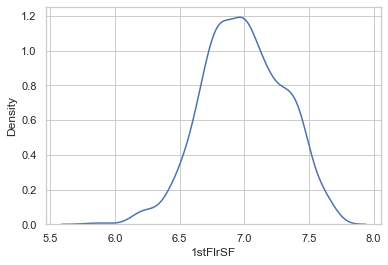

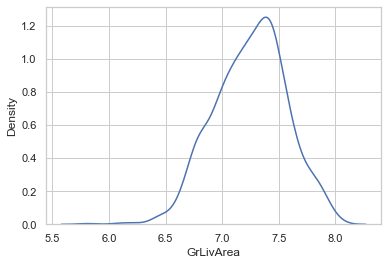

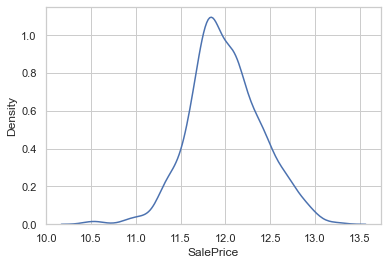

In [27]:
for feature in num_features:
    sns.kdeplot(data=df_new, x=feature,  legend=True)
    plt.show()

<AxesSubplot:xlabel='LotArea'>

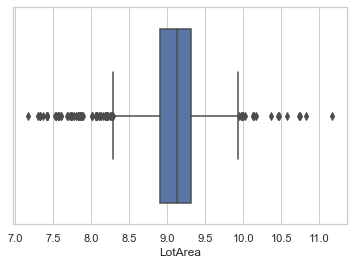

In [28]:
sns.boxplot(x = "LotArea", data=df_new)

In [30]:
mean_a = df['LotArea'].mean()
sd_a = df['LotArea'].std()
threshold = 3
outlier = []
for i in df_new['LotArea']:
    z = (i-mean_a)/sd_a
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)


outlier in dataset is []
